# Принятие решений в бизнесе 

Анализ проводится для интернет-магазинаю Необходимо проверить список гипотез для увеличения выручки. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Приоритизация-гипотез." data-toc-modified-id="Приоритизация-гипотез.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Приоритизация гипотез.</a></span></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Расчет-кумулятивных-метрик" data-toc-modified-id="Расчет-кумулятивных-метрик-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Расчет кумулятивных метрик</a></span></li><li><span><a href="#Расчет-статистической-значимости-различий" data-toc-modified-id="Расчет-статистической-значимости-различий-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Расчет статистической значимости различий</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Подготовка данных

In [105]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt


In [106]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('/content/drive/MyDrive/Data/hypothesis.csv')
    orders = pd.read_csv('/content/drive/MyDrive/Data/orders.csv')
    visitors = pd.read_csv('/content/drive/MyDrive/Data/visitors.csv')

In [107]:
display(hypothesis.head(), 
        orders.head(), 
        visitors.head())

Hypothesis  Reach  Impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   

   Confidence  Efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1

transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B

date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756

In [108]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В колонках "date" некорректный формат, необходимо скорректировать для дальнейшей работы.

In [109]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [110]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим данные на дубликаты.

In [111]:
display(orders.duplicated().sum(), 
        visitors.duplicated().sum())

0

0

Дубликаты не обнаружены.

## Приоритизация гипотез.

В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Оценим приоретизцию гипотез методами ICE и RICE.

In [112]:
hypothesis['ICE'] = round((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'], 2)
hypothesis['RICE'] = round((hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'],2)
display(hypothesis)

Hypothesis  Reach  Impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
6  Показать на главной странице баннеры с актуаль...      5       3   
7  Добавить форму подписки на все основные страни...     10       7   
8  Запустить акцию, дающую скидку на товар в день...      1       9   

   Confidence  Efforts    ICE   RICE  
0           8        6  13.33   40.0  
1           4       10   2.00    4.0  
2           7        3   7.00   56.0  
3           3        8   1.12    9.0  
4           1        1   1.00    3.0  
5           2        3   1.33    4.0  
6           8        3   8.00   40.0  
7           8        5  11.20  112.0  
8           9        5  16.20   16.2

Методом ICE рсчитали что в приоритете гипотеза "Запустить акцию, дающую скидку на товар в день рождения". Методом RICE - "Добавить форму подписки на все остальные страницы, чтобы собрать базу клиентов для email-рассылок". Вторая гипотеза набрала больше баллов за счет показателя Reach.

## Анализ A/B-теста

Результаты проведенного А/В-теста хранятся в файлах: orders.csv, visitors.csv. создадим аггрегированный по дням датафрейм для последующего анализа. 

In [113]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [114]:
#аггрегируем данные по дням
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 
                                                                                                      'group' : 'max', 
                                                                                                      'transactionId' : 'nunique', 
                                                                                                      'visitorId' : 'nunique', 
                                                                                                      'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date':'max', 
                                                                                                            'group':'max',
                                                                                                            'visitors':'sum'}), axis=1).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']                                                                                                                                            

In [115]:
cumulativeData.head()

date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845

### Расчет кумулятивных метрик

Построим график кумулятивной выручки по группам.

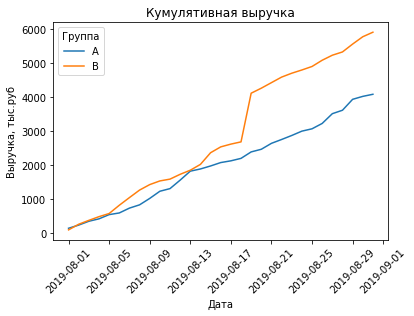

In [116]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/1000, label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/1000, label='B')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Выручка, тыс.руб')
plt.title('Кумулятивная выручка')
plt.legend(title='Группа')
plt.show()

Выручка обеих групп растет. Но в группе А - рост равномерный на протяжении всего теста, в группе В наблюдается резкое увеличение выручки 17.08.2019. В эту дату могло быт сильное увеличение заказов, либо в данных содержатся аномалии.


Теперь построим график кумулятивного среднего чека по группам

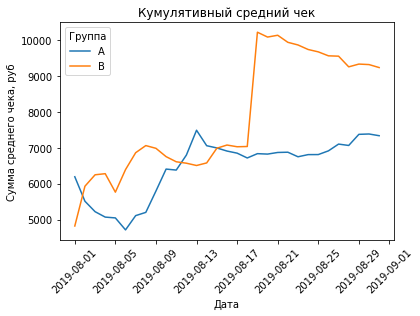

In [117]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Сумма среднего чека, руб')
plt.title('Кумулятивный средний чек')
plt.legend(title='Группа')
plt.show()

График кумулятивного среднего чека в обеи группах был нестабилен до 17.08, затем в группе А средний чек зафиксировался в районе 7000, в группе В наблюдается всплеск 17.08 с 7 до 10 тыс и затем плавное снижение к 9000. Либо 17.08 проиошло событие подтолкнувшее покупателей группы А делать более дорогие заказы. либо в отчете есть аномально высокие значения.

Посчитаем относительное различие среднего чека группы А и группы В

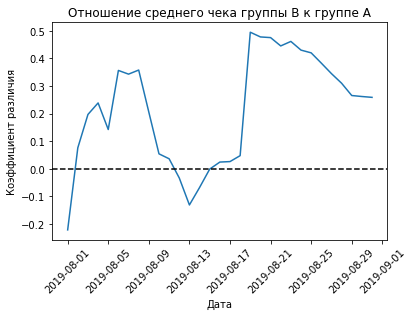

In [118]:
cumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])

plt.plot(cumulativeRevenue['date'], 
         (cumulativeRevenue['revenueB']/cumulativeRevenue['ordersB'])/(cumulativeRevenue['revenueA']/cumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Коэффициент различия')
plt.title('Отношение среднего чека группы В к группе А')
plt.show()
                                             

График показывает что отношение величины среднего чека пользователей групы В к пользователям группы А неустойчиво. 17.08 показатель резко возрастает и далее плавно снижается.

Построим график кумулятивной конверсии по группам.

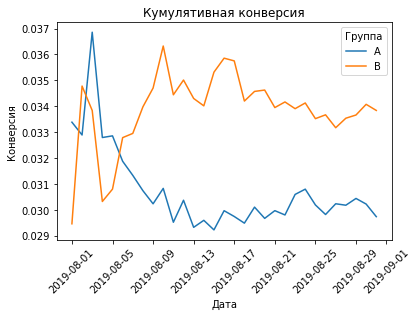

In [119]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('Кумулятивная конверсия')
plt.legend(title='Группа')
plt.show()

В начале проведени теста конверсия обеих групп сильно колебалась, затем зафиксировалась в одном диапазоне. При этом видно что конверсия группы В выросла, а конверсия группы А наоборот опустилась ниже первоначальных значений.

Построим график относителього различия комулятивной конверсии.

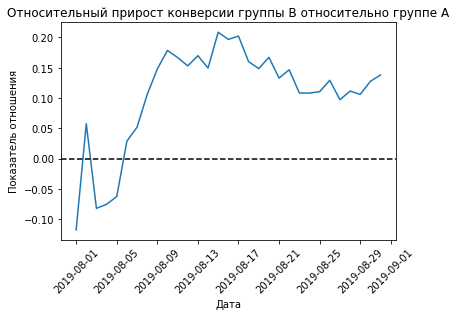

In [120]:
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']],
                                                                            on='date',
                                                                            how='left', 
                                                                            suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Показатель отношения')
plt.title('Относительный прирост конверсии группы В относительно группе А')
plt.show()

Отношение конверсий обеих групп резко повысилось в начале теста, а затем плавно начало уменьшаться и в последние недели теста опять начало повышаться.

Необходимо проверить данные на аномалиии затем сделать вывод. Посмотрим какое количество заказов совершал каждый пользователь.

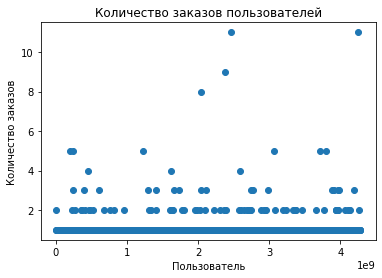

In [121]:
df = orders.groupby('visitorId').agg({'transactionId':'count'}).reset_index()
plt.scatter(df['visitorId'], df['transactionId'])

plt.title('Количество заказов пользователей')
plt.xlabel('Пользователь')
plt.ylabel('Количество заказов')
plt.show()

В основном один пользователь совершал 1-2 заказа. Но есть пользователи, совершившие больше 10 заказов, их очень мало, но они искажают результаты теста.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границы аномальных значений.

In [122]:
np.percentile(df['transactionId'], [95, 99])

array([2., 4.])

5% пользователей сделали 2 заказа, 1% пользователей сделал 4 заказа. Можно сделать вывод что значения 3 заказа и выше можно считать аномалиями и их нужно исключить из анализа

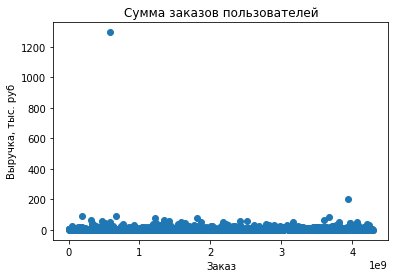

In [123]:
plt.scatter(orders['transactionId'], orders['revenue']/1000)
plt.xlabel('Заказ')
plt.ylabel('Выручка, тыс. руб')
plt.title('Сумма заказов пользователей')
plt.show()

Большинство заказов пользователей расположены в районе 0-100 тыс. Но есть несколько выбивающихся значений. 

Проверим на аномалии, также посчитем 95-й и 99-й перцентиль стоимости заказов и определим границы аномалий.

In [124]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

5% пользователей сделали заказ на сумму 28 тыс. Аномально высокими значениями можно считать сумму выручки более 28 тыс.

### Расчет статистической значимости различий


Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.
Сформулируем гипотезы. Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть.

Сначала проверим что в тесте не было пользователей, участвовавших в обеих группах исследования.

In [125]:
orders.query('group == "A"')['visitorId'].isin(orders.query('group == "B"')['visitorId']).sum()

89

In [126]:
len(orders['visitorId'].unique())

1031

89 пользователей попали в обе группы исследования. Это примерно 8% от общего количества пользоателей. Поскольку данные собраны в одну таблицу. выбрать строи для удаления сложно, поэтому оставим без изменений.

Для анализа А/В теста соберем данные в единую таблицу, где:
- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [127]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head()

date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               380996               507   
3                  78               489567               717   
4                 101               581995               756   

   visitorsPerDateB  visitorsCummulativeA  visitorsCummulativeB  
0               713                   719                   713  
1               581                  1338                  1294  
2               509                  1845                  1803  
3               770                  2562                  2573  
4               707                  3318                  3280

In [128]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [130]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


p-value - 0,02, это меньше статистической значимости 0,05. Мы можем опровергнуть нулевую гипотезу об отсутствии различий между конверсиями обеих групп пользователей. В относительном выражении результаты группы В на 13,8% лучше группы А.

Теперь  посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [131]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


0.729
0.259


p-value - 0,729 что больше статистической значимости. Вероятность получить одинаковый средний чек равна 73%. Это достаточно большой процент, что говорит о том что нулевая гипотеза не может быть опровергнута. При этом в относительном выржении средний чек в группе В больше среднего чека группы А на 26%.


Теперь очистим данные от аномальных значений и посчитаем статистическую значимость различий в конверсии между группами.

In [132]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64
63


В аномальные значения попали только 63 пользоватля.

In [133]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [134]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.018
0.148


Результаты сравнения конверсии по очищенным данным практически не отличаются от исходных. p-value - 0,018 ниже статистической значимсти, а значит мы можем опровергнуть нулевую гипотезу.


Теперь посмотрим на средний чек в обеих группах.

In [135]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.977
-0.017


Сравнение среднего чека по очищенным данным показало что p-value = 0,977, что также не дает опровергнуть нулевую гипотезу, вероятность выше чем в "сырых" данных, но относительное сравнение среднего чека показывает другой результат. По очищенным данным средний чек группы В ниже среднего чека группы А на 2%.


## Вывод

1. Средний чек в группе В выше чем в группе А, но к концу теста отношение постепенно снижается.
2. Конверсия группы В лучше группы А и к концу теста показатель начал расти.
3. Статистически значимые различия по конверсии между группами есть. Конверсия группы В лучше группы А на 13% по сырым данным и на 15% по очищенным от аномалий данным.
4. Нет статистически значимого различия по среднему чеку между группами.

Тест можно остановить, исследование показало, что показатели пользователей группы В лучше группы А.